# Space Charge Benchmark

Impact-Z only space charge benchmark from

C. Mayes, R. Ryne, D. Sagan
3D SPACE CHARGE IN BMAD
https://epaper.kek.jp/ipac2018/papers/thpak085.pdf

In [1]:
import impact.z as IZ
from impact.z import ImpactZ, ImpactZInput, WriteFull, Drift

from scipy.constants import c

from pmd_beamphysics.units import mec2

import numpy as np

In [2]:
energy0 = 10e6
gamma0 = energy0 / mec2
betagamma0 = np.sqrt(gamma0**2 - 1)
sigma_x0 = 1e-3
sigma_y0 = 1e-3
sigma_z0 = 0.1e-3

beta_x0 = 1000
beta_y0 = 100
n_particle = 100_000

In [3]:
input = ImpactZInput(
    initial_particles=None,
    ncpu_y=1,
    ncpu_z=1,
    seed=-1,
    n_particle=n_particle,
    nx=32,
    ny=32,
    nz=32,
    distribution=IZ.DistributionType.gauss,
    twiss_beta_x=beta_x0,
    twiss_norm_emit_x=sigma_x0**2 * betagamma0 / beta_x0,
    twiss_beta_y=beta_y0,
    twiss_norm_emit_y=sigma_y0**2 * betagamma0 / beta_y0,
    average_current=0.13000000000000006,
    reference_kinetic_energy=9489001.04931,
    reference_particle_mass=510998.95069,
    reference_particle_charge=-1.0,
    reference_frequency=1300000000.0,
    lattice=[
        WriteFull(name="initial_particles", file_id=100),
        Drift(
            name="P1",
            metadata={"bmad_csr": False, "bmad_id": 1},
            length=1.0,
            steps=100,
            map_steps=100,
        ),
        WriteFull(name="final_particles", file_id=101),
    ],
)
input.set_twiss_z(0.1e-3 / c, 1)
input

ImpactZInput(
    initial_particles=None,
    ncpu_y=1,
    ncpu_z=1,
    gpu=IZ.GPUFlag.disabled,
    seed=-1,
    n_particle=100000,
    integrator_type=IZ.IntegratorType.linear_map,
    err=1,
    diagnostic_type=IZ.DiagnosticType.extended,
    nx=32,
    ny=32,
    nz=32,
    boundary_type=IZ.BoundaryType.trans_open_longi_open,
    radius_x=0.0,
    radius_y=0.0,
    z_period_size=0.0,
    distribution=IZ.DistributionType.gauss,
    restart=0,
    subcycle=0,
    nbunch=1,
    particle_list=[0],
    current_list=[0.0],
    charge_over_mass_list=[0.0],
    twiss_alpha_x=0.0,
    twiss_beta_x=1000.0,
    twiss_norm_emit_x=1.954394516081986e-08,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    twiss_alpha_y=0.0,
    twiss_beta_y=100.0,
    twiss_norm_emit_y=1.9543945160819862e-07,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    twiss_alpha_z=1e-09,
    twiss_beta_z=156107.99655273516,
    twiss_norm_emit_z=1.5610799655273516e-07,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    average_current=0.13000000000000006,
    reference_kinetic_energy=9489001.04931,
    reference_particle_mass=510998.95069,
    reference_particle_charge=-1.0,
    reference_frequency=1300000000.0,
    initial_phase_ref=0.0,
    lattice=[
        WriteFull(
            name='initial_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=100,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        Drift(
            name='P1',
            metadata={'bmad_csr': False, 'bmad_id': 1},
            length=1.0,
            steps=100,
            map_steps=100,
            type_id=0,
            radius=1.0
        ),
        WriteFull(
            name='final_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=101,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        )
    ],
    filename=None,
    verbose=False
)

In [4]:
I = ImpactZ(input)
I.run()
P0 = I.output.particles["initial_particles"]
P1 = I.output.particles["final_particles"]

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
P0 = I.output.particles["initial_particles"]
(
    P0["sigma_x"] / sigma_x0,
    P0["sigma_y"] / sigma_y0,
    P0["sigma_t"] * c / sigma_z0,
    P0["mean_energy"] / energy0,
)

(np.float64(1.000135340064495),
 np.float64(0.9969477451982962),
 np.float64(0.9984894952855283),
 np.float64(0.9999999992327986))

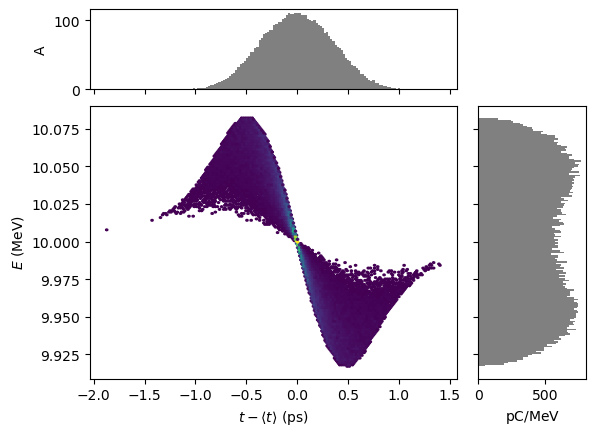

In [6]:
P1.plot("delta_t", "energy")

# Try again with particles

In [7]:
I2 = ImpactZ(input, initial_particles=P0)
I2.run()
P3 = I2.output.particles["initial_particles"]
P4 = I2.output.particles["final_particles"]

  0%|          | 0/3 [00:00<?, ?it/s]

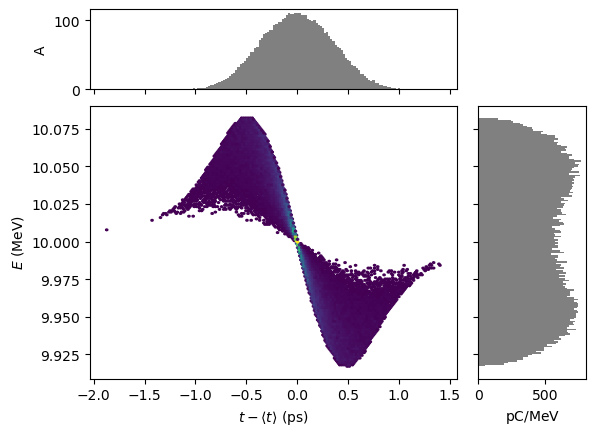

In [8]:
P4.plot("delta_t", "energy")